In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from warnings import warn
from matplotlib.widgets import Slider
import time
%load_ext autoreload
%autoreload 2

from hungarian import preprocess, alternate, hungarian, hungarian3, augment
from transport import gaussian_transport, gaussian_discreatization

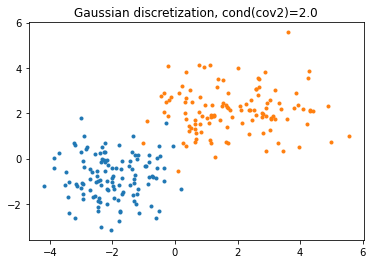

In [2]:
%matplotlib inline
rng = np.random.default_rng(1234)
d = 2
n=120
mean1, mean2 = np.array([-2,-1]), np.array([2,2])
cov1, cov2 = np.array([[1,0],[0,1]]), np.array([[2,0],[0,1]])

transport, W_true = gaussian_transport(mean1, cov1, mean2, cov2)
mu, nu, C = gaussian_discreatization(mean1, cov1, mean2, cov2, n, rng)

plt.plot(mu[:,0],mu[:,1],'.')
plt.title("Gaussian discretization, cond(cov1)="+str(np.linalg.cond(cov1)))
plt.plot(nu[:,0],nu[:,1],'.')
plt.title("Gaussian discretization, cond(cov2)="+str(np.linalg.cond(cov2)))
plt.savefig("graphics/hungarian_mu_nu.pdf")

In [3]:
row,x,phi,U,V, W_hungarian = hungarian3(C)

hungarian3 succed (feasibility and complementary slackness holds)


W_true = 25.17157287525381
W_hungarian = 23.79429798390248
Error = -1.3772748913513269
cond(cov1)= 1.0 cond(cov12)= 2.0


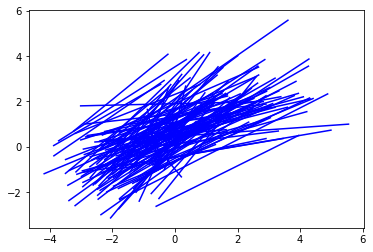

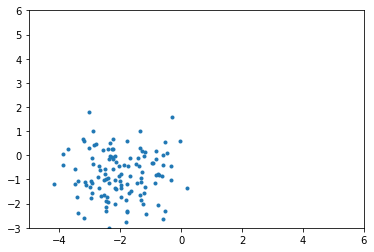

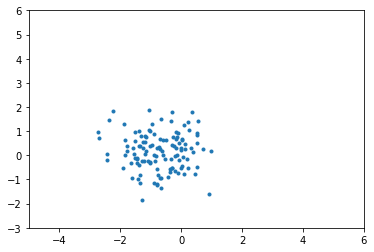

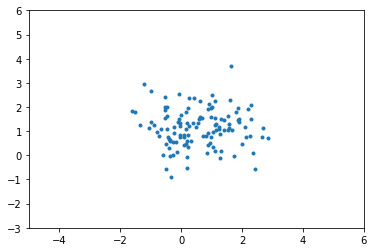

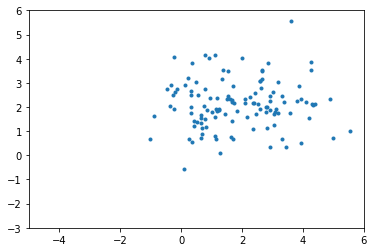

In [4]:
row = row.astype(np.int16)
print("W_true =",W_true)
#transported_mu = np.array([transport(mu[:,i] for i in range(n))]).T
#W_true_discretized = np.sum((mu[:,np.newaxis,:] - transported_mu)**2, axis=2) / n
print("W_hungarian =",W_hungarian)
print("Error =",W_hungarian-W_true)
print("cond(cov1)=",np.linalg.cond(cov1),"cond(cov12)=",np.linalg.cond(cov2))

plt.plot([mu[:,0],nu[row,0]],[mu[:,1],nu[row,1]],'blue')

for i,t in enumerate(np.linspace(0,1,4)):
    plt.figure()
    xx = (1-t)*mu[:,0] + t*nu[row,0]
    yy = (1-t)*mu[:,1] + t*nu[row,1]
    plt.xlim((-5,6))
    plt.ylim((-3,6))
    plt.plot(xx,yy,'.')
    plt.savefig("graphics/hungarian_geodesic"+str(i)+".pdf")

In [8]:
%matplotlib
fig, (ax1,ax2) = plt.subplots(2)
s = Slider(ax = ax2, label = 'time', valmin = 0., valmax = 1., valinit = 0.)
def update(val):
    t=s.val
    xx = (1-t)*mu[:,0] + t*nu[row,0]
    yy = (1-t)*mu[:,1] + t*nu[row,1]
    ax1.cla()
    ax1.set_xlim((-5,5))
    ax1.set_ylim((-3,4))
    ax1.plot(xx,yy,'.')
s.on_changed(update)
update(0)
plt.show()

Using matplotlib backend: MacOSX


IndexError: arrays used as indices must be of integer (or boolean) type

Traceback (most recent call last):
  File "/Users/benoitmuller/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/Users/benoitmuller/opt/anaconda3/lib/python3.9/site-packages/matplotlib/widgets.py", line 585, in <lambda>
    return self._observers.connect('changed', lambda val: func(val))
  File "/var/folders/4p/dkkns1r90jngnrbymzmfpw840000gn/T/ipykernel_84180/471536412.py", line 6, in update
    xx = (1-t)*mu[:,0] + t*nu[row,0]
IndexError: arrays used as indices must be of integer (or boolean) type
Traceback (most recent call last):
  File "/Users/benoitmuller/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/Users/benoitmuller/opt/anaconda3/lib/python3.9/site-packages/matplotlib/widgets.py", line 585, in <lambda>
    return self._observers.connect('changed', lambda val: func(val))
  File "/var/folders/4p/dkkns1r90jngnrbymzmfpw840

In [6]:
%matplotlib inline
times = []
error = []
nn = 2**np.arange(1,9)
for n in nn:
    mu, nu, C = gaussian_discreatization(mean1, cov1, mean2, cov2, n, rng)
    tic = time.time()
    row,x,phi,U,V, W_hungarian = hungarian3(C)
    times.append(time.time()-tic)
    error.append((W_hungarian-W_true)/W_true)

hungarian3 succed (feasibility and complementary slackness holds)
hungarian3 succed (feasibility and complementary slackness holds)
hungarian3 succed (feasibility and complementary slackness holds)
hungarian3 succed (feasibility and complementary slackness holds)
hungarian3 succed (feasibility and complementary slackness holds)
hungarian3 succed (feasibility and complementary slackness holds)
hungarian3 succed (feasibility and complementary slackness holds)
hungarian3 succed (feasibility and complementary slackness holds)


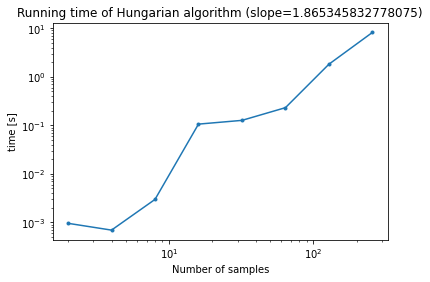

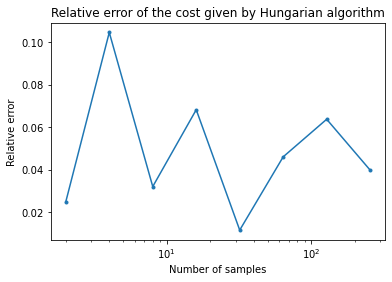

In [7]:
plt.loglog(nn,times,'.-')
slope = np.log(times[-1]/times[0]) / np.log(nn[-1]/nn[0])
plt.title("Running time of Hungarian algorithm (slope="+str(slope)+")")
plt.xlabel("Number of samples")
plt.ylabel("time [s]")
plt.savefig("graphics/hungarian_time.pdf")

plt.figure()
plt.semilogx(nn,np.abs(error),'.-')
plt.title("Relative error of the cost given by Hungarian algorithm")
plt.xlabel("Number of samples")
plt.ylabel("Relative error")
plt.savefig("graphics/hungarian_error.pdf")

In [9]:
μ=1
print(μ)

1


: 